Analysis of 100 simulations results on a network of the five NYC boroughs without variations of the commuting matrix during the simulations, using in case 1 the SIRcompleto_cluster2 code and in case 2 the code developed.
Here I present the results concerning the number of recovered in each borough at the end of the simulations, in order to visualize the differences in the pandemic spreading and incidence that can be enlighted from the two codes.
Simulations have been performed with $R_0 = 3$.

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.lines as mlines
import numpy as np
import statsmodels.api as ssm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [9]:
df_base = pd.read_csv("/home/claudia/Scrivania/Tesi NYC pandemic /Modello_mobility5_var_commuting/Analysis/Recovered_R0_3_basemodel.csv")
df_nomobility = pd.read_csv("/home/claudia/Scrivania/Tesi NYC pandemic /Modello_mobility5_var_commuting/Analysis/Recovered_novarcomm_R0_3.csv")


#calcolo la frazione di recovered in base alla popolazione totale di ogni borough
df_base['Manhattan'] = df_base['Manhattan'].div(1628706)
df_nomobility['Manhattan'] = df_nomobility['Manhattan'].div(1628706)

df_base['Bronx'] = df_base['Bronx'].div(1418207)
df_nomobility['Bronx'] = df_nomobility['Bronx'].div(1418207)

df_base['Brooklyn'] = df_base['Brooklyn'].div(2559903)
df_nomobility['Brooklyn'] = df_nomobility['Brooklyn'].div(2559903)

df_base['Queens'] = df_base['Queens'].div(2253858)
df_nomobility['Queens'] = df_nomobility['Queens'].div(2253858)

df_base['StatenIsland'] = df_base['StatenIsland'].div(476143)
df_nomobility['StatenIsland'] = df_nomobility['StatenIsland'].div(476143)


In [10]:
data = [ df_base['Manhattan'],df_nomobility['Manhattan'], df_base['Bronx'], df_nomobility['Bronx'], df_base['Brooklyn'],  df_nomobility['Brooklyn'], df_base['Queens'], df_nomobility['Queens'], df_base['StatenIsland'], df_nomobility['StatenIsland']]

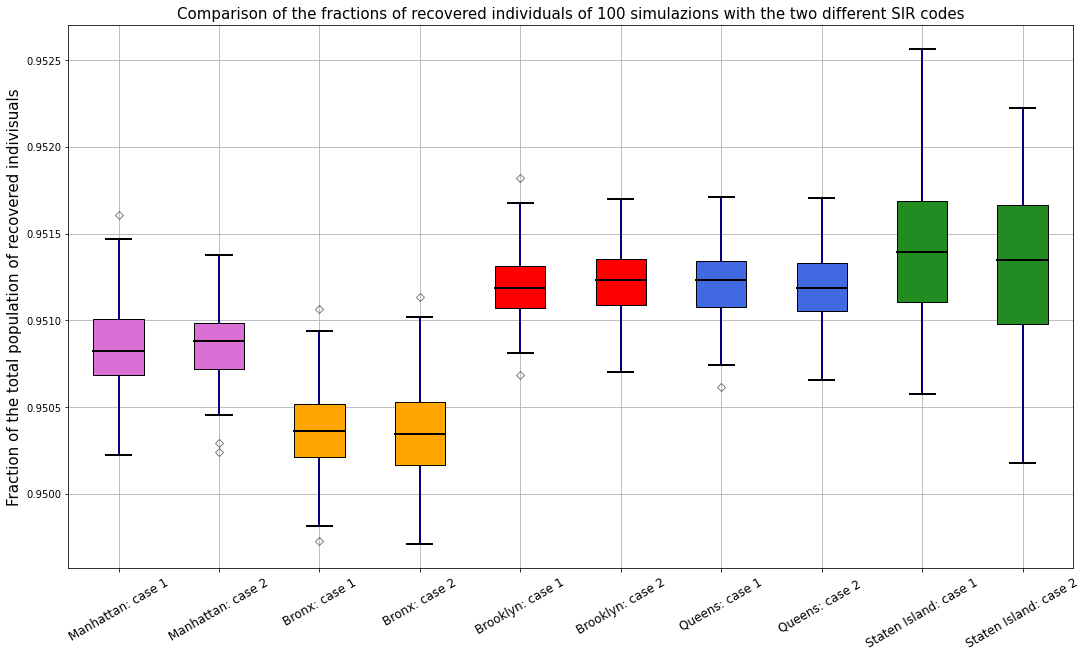

In [16]:
fig = plt.figure(1, figsize = (18, 10))
ax = fig.add_subplot(111)
bp = ax.boxplot(data, patch_artist = True, vert = 1)

colors = ['orchid', 'orchid', 'orange', 'orange','red', 'red', 'royalblue', 'royalblue', 'forestgreen', 'forestgreen'] 
  
for patch, color in zip(bp['boxes'], colors): 
    patch.set_facecolor(color);
    
for whisker in bp['whiskers']: 
    whisker.set(color ='navy', linewidth = 2) 
    
for cap in bp['caps']: 
    cap.set(color ='black', linewidth = 2)

for median in bp['medians']: 
    median.set(color ='black',linewidth = 2) 
    
for flier in bp['fliers']: 
    flier.set(marker ='D', color ='black', alpha = 0.5) 
      
ax.set_xticklabels(['Manhattan: case 1', 'Manhattan: case 2', 'Bronx: case 1', 'Bronx: case 2', 'Brooklyn: case 1','Brooklyn: case 2', 'Queens: case 1', 'Queens: case 2 ', 'Staten Island: case 1', 'Staten Island: case 2'], rotation = 30, fontsize = 12) 
ax.set_ylabel('Fraction of the total population of recovered indivisuals', fontsize = 15)
plt.title("Comparison of the fractions of recovered individuals of 100 simulazions with the two different SIR codes", fontsize = 15) 
plt.grid()